# What is the True Normal Human Body Temperature? 

### Molly McNamara
#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>



#### Import Dataset and Do Some Preliminary Evaluation

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#First a quick look at the dataset structure
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## 1.  Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

We can evaluate this both visually and with statistical tests.

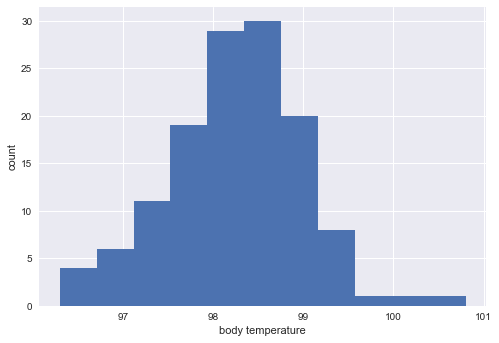

In [4]:
# Evaluate the dataset visually with a histogram
sns.set()
n_data = len(df.temperature)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(df.temperature, bins = n_bins)
plt.xlabel('body temperature')
plt.ylabel('count')
plt.show()

In [5]:
#The SciPy function normaltest can test the null hypothesis that a sample set is normally distributed.
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The normal test is unable to reject the null hypothesis that the sample set is normally distributed.  Based on these results, we can conclude that the distribution of the body temperatures in this dataset is normal.

## 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

The sample size (n=130) is adequately large (>30 for CLT) and the samples are independent as they are taken from different individuals.

## 3. Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t  or  z  statistic?
Now try using the other test. How is the result be different? Why?

In [6]:
normal = 98.6
np.mean(df.temperature)

98.24923076923078

A one sample test is appropriate as the sample set of temperatures is to be tested against the population mean of 98.6F.  While a Z statistic would be appropriate because the sample size is sufficiently large and the data is normally distributed, it requires knowing the population variance, which we do not.  Therefore a t test is more appropriate.  

In [7]:
stats.ttest_1samp(df.temperature, normal)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Based on this result (the t-test shows a significant difference between our sample and the supposed population mean), the true population mean, based on this dataset, is NOT 98.6 F.

In [8]:
import statsmodels.api as sm
sm.stats.ztest(df.temperature, value=normal)

/Users/mollymcnamara/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-5.4548232923645195, 4.9021570141012155e-08)

The Z test also rejects the null hypothesis that there is no difference between the supposed population mean and the dataset mean.

## 4. Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [9]:
sampleof10 = df.sample(10)
print(sampleof10)

     temperature gender  heart_rate
123         97.2      F        66.0
68          98.7      F        82.0
36          99.1      M        71.0
5           99.2      M        83.0
96          99.9      F        79.0
12          98.2      M        72.0
32          98.5      M        71.0
80          98.8      F        73.0
75          98.8      M        78.0
90          97.8      M        74.0


In [10]:
stats.ttest_1samp(sampleof10.temperature, normal)

Ttest_1sampResult(statistic=0.083559300563345623, pvalue=0.9352358796563186)

In [11]:
sm.stats.ztest(sampleof10.temperature, value=normal)

(0.083559300563345623, 0.93340682716521761)

The t-test is the correct test to use because of the very small sample size.  However based on this random very small sampling of the larger dataset, both tests are unable to reject the null hypothesis that there is no difference between the supposed population mean and the dataset mean

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [12]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    print('Data mean =', m, ' 95% Confidence Interval =', m-h, m+h)

mean_confidence_interval(df.temperature)

Data mean = 98.2492307692  95% Confidence Interval = 98.1220029056 98.3764586329


Based on this calculation, abnormal is a temperature outside of this confidence interval, which means even 98.6F would be considered abnormal!

## 6. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

A 2 sample t test is appropriate to use in this situation because we are trying to determine if the population means between the two genders are different.

In [13]:
male_data = df[df['gender'].str.contains('M')]
female_data = df[df['gender'].str.contains('F')]

In [14]:
print('Mean Temperature for Males =', np.mean(male_data.temperature))
print('Mean Temperature for Females =', np.mean(female_data.temperature))

Mean Temperature for Males = 98.1046153846154
Mean Temperature for Females = 98.39384615384613


In [15]:
stats.ttest_ind(male_data.temperature, female_data.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

Based on this test, the temperature is in fact significantly different between males and females in this study.  Clearly this is something that may require further investigation to determine if the difference is a true biological one or influenced by other factors involved in the study design (consistency of room temperature or collection time, time in menstrual cycle for female participants, etc).